## Titanic Data EDA

In [131]:
#Iporting package and converting .csv file to dataframe using pandas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

## Step 1: Data Understanding
* Dataframe shape
* head and tail
* dtypes
* describe

In [132]:
train_data=pd.read_csv("train.csv")
train_data.shape #Give (row, column)

(891, 12)

In [133]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [135]:
#Type casting some object to category for better insight on categorical data
train_data.Sex=train_data['Sex'].astype("category")
train_data.Embarked=train_data['Embarked'].astype("category")
train_data.Pclass=train_data['Pclass'].astype("category")
train_data.Survived=train_data['Survived'].astype("category")

In [136]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


In [137]:
train_data.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [138]:
train_data.describe(include="category")

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


In [139]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Step 2: Feature Understanding
(Univariate analysis)

* Plotting Feature Distributions
    - Countplot
    - distribution plot
    - histogram

In [140]:
len(train_data["Survived"])

891

The percentage of the total passeneger that died is  61.62% while only  38.38% survived


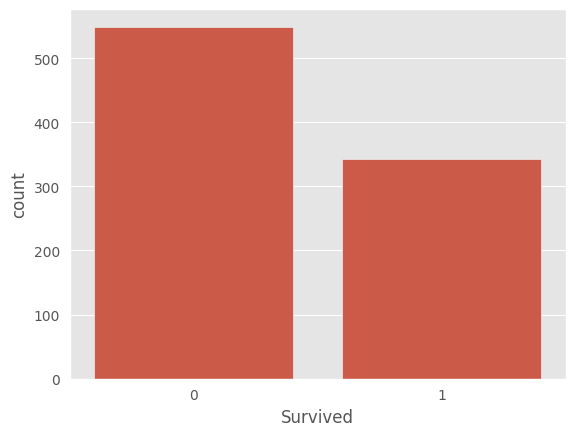

In [141]:
# 0 denotes dead while 1 denotes survived)
sns.countplot(x="Survived", data=train_data)
count_d = train_data.loc[train_data["Survived"] == 0]["Survived"].count()
per_d = count_d/len(train_data["Survived"])*100
print(f'The percentage of the total passeneger that died is {per_d: .2f}% while only {100-per_d: .2f}% survived')  

Text(0.5, 1.0, 'Distribution Plot for Age')

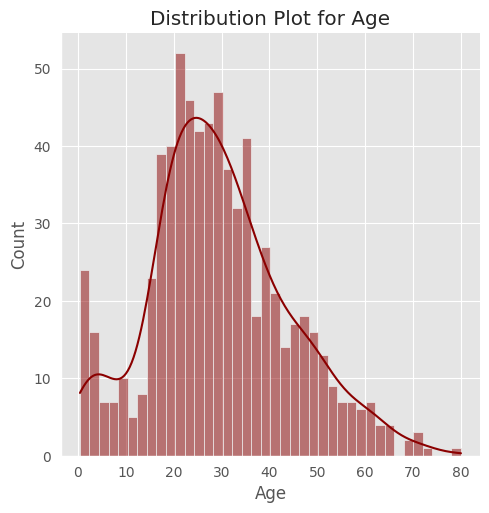

In [142]:
sns.displot(train_data['Age'].dropna(),kde=True,color='darkred',bins=40)
plt.title("Distribution Plot for Age")

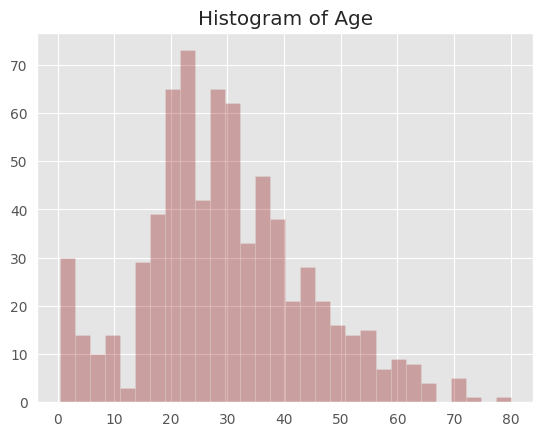

In [143]:
#.hist function in pandas to create a histogram 
ax = train_data['Age'].hist(bins=30,color='darkred',alpha=0.3)
ax.set_title("Histogram of Age")
plt.show()

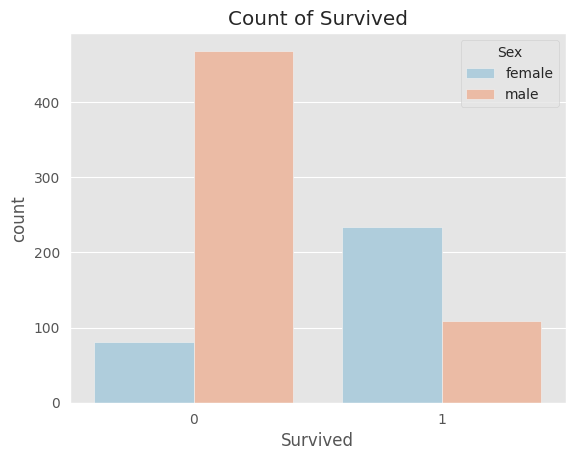

In [144]:
ax = sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')
ax.set_title("Count of Survived")
plt.show()

In [145]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f"Percentage of men who survived: {rate_men*100: .2f}%")

Percentage of men who survived:  18.89%


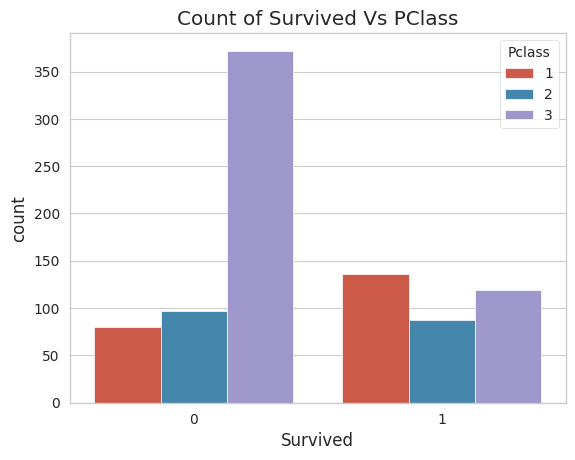

In [146]:
sns.set_style('whitegrid')
ax = sns.countplot(x="Survived",hue='Pclass',data=train_data)
ax.set_title("Count of Survived Vs PClass")
plt.show()


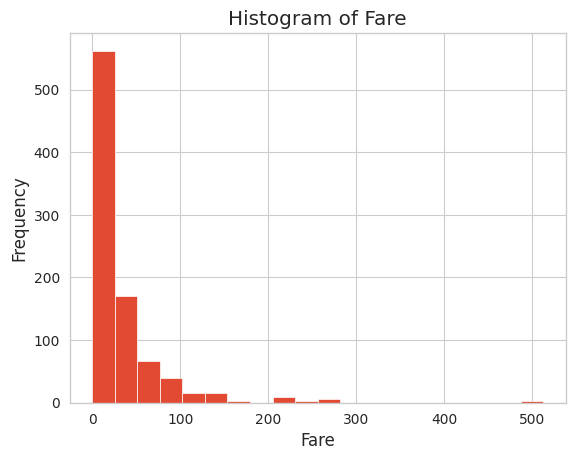

In [147]:
ax = train_data['Fare'].plot(kind='hist',
                          bins=20,
                          title='Histogram of Fare')
ax.set_xlabel('Fare')
plt.show()

In [148]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Step 3: Data Preperation


In [149]:
#Finding null values for each given attribute
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [150]:
#Checking for duplicated rows
train_data.loc[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


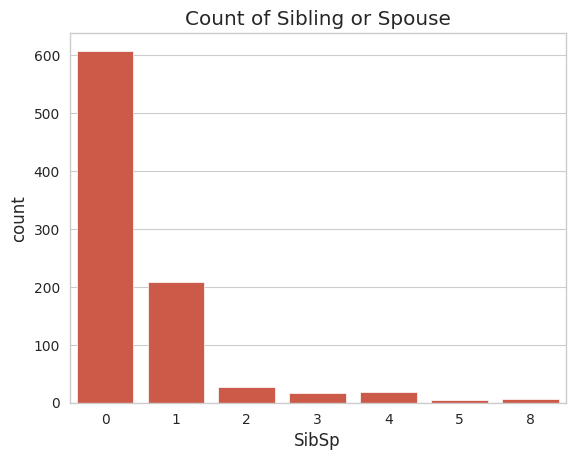

In [151]:
ax=sns.countplot(x='SibSp', data=train_data)
ax.set_title("Count of Sibling or Spouse")
plt.show()

## Data Cleaning
* Filling missing values for Attribute Age

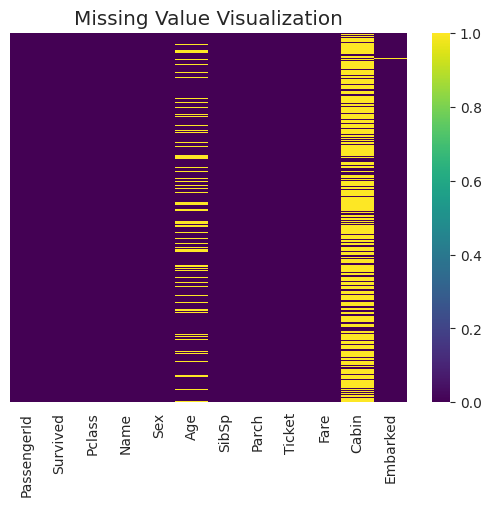

In [152]:
#Missing value heat map visualization
ax = sns.heatmap(data = train_data.isnull(),
            yticklabels=False,
            cbar=True,
            cmap='viridis')
ax.set_title("Missing Value Visualization")
plt.show()

In [153]:
# Using simple mean to replace all missing value 
# train_data["Age"].mean()
# train_data['Age'].fillna(29, inplace=True) 

<Axes: ylabel='Age'>

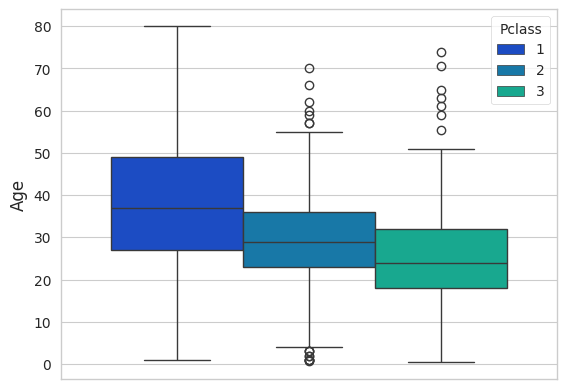

In [154]:
sns.boxplot(hue='Pclass',y='Age',data=train_data,palette='winter')

In [155]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [156]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

/tmp/ipykernel_39500/822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_39500/822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [157]:
#Attribute Cabin is missing a lot of values so we need to drop the attribute
train_data=train_data.drop(['Cabin'], axis=1).copy()

In [158]:
train_data.dropna(inplace=True)

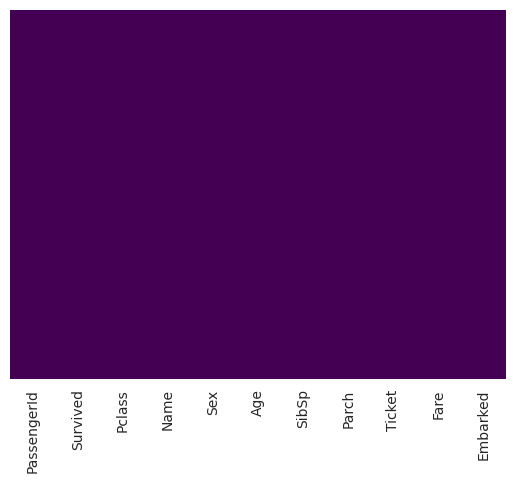

In [159]:
#Rechecking heatmap
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [160]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"Percentage of women who survived: {rate_women*100: .2f}%")

Percentage of women who survived:  74.04%


In [161]:
import cufflinks as cf
cf.go_offline()

In [162]:
train_data['Fare'].iplot(kind='hist',bins=30,color='green')

## One hot encoding

In [163]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 59.5+ KB


In [164]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True).astype(int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [165]:
embark = pd.get_dummies(train_data['Embarked'],drop_first=True).astype(int)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [166]:
#Dropping all unecessary varaiables
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [167]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [168]:
train_data = pd.concat([train_data,sex,embark],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Data is ready for modeling

## Step 4: Feature Relationships
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

In [171]:
td_cor = train_data[['Survived','Pclass','Age',
                     'SibSp','Parch','Fare','male','Q','S']].dropna().corr()
td_cor    

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


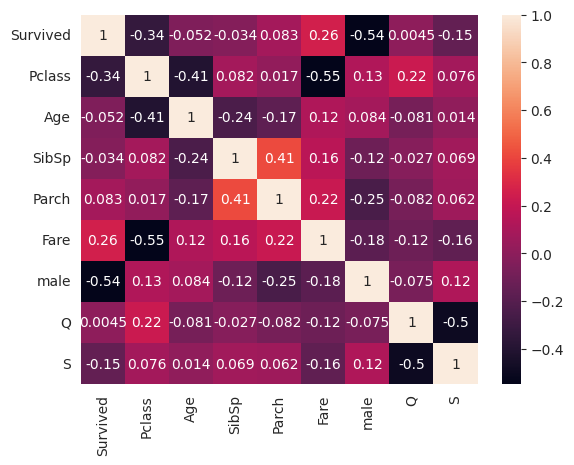

In [172]:
sns.heatmap(td_cor, annot=True)
plt.show()